In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib as plt
import numpy as np
from citipy import citipy

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
coordinates

[(41.903437931599996, 142.7652728748638),
 (-79.03472792501343, 88.80581356859801),
 (12.59913862914081, 101.1146644322128),
 (-39.04767029741414, -138.81606218804322),
 (-26.02729848964858, -24.24929091837251),
 (-50.866273349761684, 100.03022060556236),
 (5.9237482897133305, 36.76022348333336),
 (-48.340071668205226, -53.896071531057004),
 (-29.735804819727974, 73.09884341900954),
 (-14.606091112902789, -106.71693060462196),
 (9.981279999334674, 21.80660952095107),
 (-32.84601192431549, 179.4601895709128),
 (-80.60844084396345, -99.39764478354324),
 (-86.32115626769875, -90.45706445966452),
 (4.3003164050875995, -25.085442160659483),
 (56.23556264241873, 33.81462333930304),
 (-0.315092937849343, -111.84742714519825),
 (-81.87725365396261, 75.66716197482864),
 (-52.32907624023284, -166.79528979331062),
 (-10.260284837764843, -143.1414117210932),
 (-88.99651291708912, 25.707152081608257),
 (-23.294270252761237, 150.46417076449308),
 (78.4153246406033, -136.3236612861852),
 (-23.7957623

In [18]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
len(cities)



577

In [19]:
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
from config import weather_api_key
#create url api and print the url
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73f9b4b092bc4cc6602310e64c1f5747


In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | shizunai
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | ban chang
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | bako
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | birao
Processing Record 11 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | olenino
Processing Record 15 of Set 1 | lazaro cardenas
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | rockhampton
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | armacao dos buzios
City not found. Skipping...
Processing Record 22 of Set 1 | butaritari
Processing Recor

Processing Record 36 of Set 4 | cabo san lucas
Processing Record 37 of Set 4 | vostok
Processing Record 38 of Set 4 | sivaki
Processing Record 39 of Set 4 | alekseyevka
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | vaerlose
Processing Record 42 of Set 4 | narsaq
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | praya
Processing Record 47 of Set 4 | port-cartier
Processing Record 48 of Set 4 | reinheim
Processing Record 49 of Set 4 | puerto escondido
Processing Record 50 of Set 4 | yar-sale
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | new norfolk
Processing Record 4 of Set 5 | willmar
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | privokzalnyy
City not found. Skipping...
Processing Record 7 of Set 5 | little current
Processing Record 8 of Set 5 | tuatapere
Proc

Processing Record 25 of Set 8 | darnah
Processing Record 26 of Set 8 | ohafia
Processing Record 27 of Set 8 | anloga
Processing Record 28 of Set 8 | ushtobe
Processing Record 29 of Set 8 | stephenville crossing
Processing Record 30 of Set 8 | belokurikha
Processing Record 31 of Set 8 | san buenaventura
Processing Record 32 of Set 8 | vlasenica
Processing Record 33 of Set 8 | north bend
Processing Record 34 of Set 8 | marfino
Processing Record 35 of Set 8 | agadir
Processing Record 36 of Set 8 | araouane
Processing Record 37 of Set 8 | barbar
City not found. Skipping...
Processing Record 38 of Set 8 | halalo
City not found. Skipping...
Processing Record 39 of Set 8 | menongue
Processing Record 40 of Set 8 | lapovo
Processing Record 41 of Set 8 | port pirie
Processing Record 42 of Set 8 | acapulco
Processing Record 43 of Set 8 | kazachinskoye
Processing Record 44 of Set 8 | hihifo
City not found. Skipping...
Processing Record 45 of Set 8 | samusu
City not found. Skipping...
Processing Re

Processing Record 14 of Set 12 | hengshui
Processing Record 15 of Set 12 | totness
Processing Record 16 of Set 12 | treinta y tres
Processing Record 17 of Set 12 | tsaratanana
Processing Record 18 of Set 12 | varzea da palma
Processing Record 19 of Set 12 | sur
Processing Record 20 of Set 12 | paradwip
City not found. Skipping...
Processing Record 21 of Set 12 | haverfordwest
Processing Record 22 of Set 12 | bandarbeyla
Processing Record 23 of Set 12 | christchurch
Processing Record 24 of Set 12 | murgab
Processing Record 25 of Set 12 | souillac
Processing Record 26 of Set 12 | mapiripan
Processing Record 27 of Set 12 | uglovka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [22]:
len(city_data)

523

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df=pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shizunai,42.3339,142.3669,25.74,89,71,16.73,JP,2021-01-27 17:07:13
1,Busselton,-33.6500,115.3333,53.01,79,0,12.77,AU,2021-01-27 17:01:15
2,Ban Chang,12.7254,101.0553,77.00,94,40,2.30,TH,2021-01-27 17:09:35
3,Rikitea,-23.1203,-134.9692,79.99,70,0,13.60,PF,2021-01-27 17:00:09
4,Vila Velha,-20.3297,-40.2925,87.80,55,40,14.97,BR,2021-01-27 17:01:56
5,Bako,5.7833,36.5667,72.25,33,1,4.05,ET,2021-01-27 17:09:36
6,Necochea,-38.5473,-58.7368,73.00,46,0,5.99,AR,2021-01-27 17:09:36
7,Bambous Virieux,-20.3428,57.7575,80.60,74,20,5.75,MU,2021-01-27 17:00:27
8,Puerto Ayora,-0.7393,-90.3518,84.20,70,75,14.97,EC,2021-01-27 17:09:37
9,Birao,10.2849,22.7882,85.26,14,91,4.92,CF,2021-01-27 17:09:38


In [24]:
new_column=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shizunai,JP,2021-01-27 17:07:13,42.3339,142.3669,25.74,89,71,16.73
1,Busselton,AU,2021-01-27 17:01:15,-33.6500,115.3333,53.01,79,0,12.77
2,Ban Chang,TH,2021-01-27 17:09:35,12.7254,101.0553,77.00,94,40,2.30
3,Rikitea,PF,2021-01-27 17:00:09,-23.1203,-134.9692,79.99,70,0,13.60
4,Vila Velha,BR,2021-01-27 17:01:56,-20.3297,-40.2925,87.80,55,40,14.97
...,...,...,...,...,...,...,...,...,...
518,Christchurch,NZ,2021-01-27 17:12:00,-43.5333,172.6333,63.00,88,20,18.41
519,Murgab,TM,2021-01-27 17:12:00,37.4966,61.9714,41.00,70,0,4.61
520,Souillac,MU,2021-01-27 17:12:00,-20.5167,57.5167,77.00,83,20,6.91
521,Mapiripan,CO,2021-01-27 17:12:00,2.8892,-72.1256,88.47,49,72,11.52


In [25]:
# Create the output file (CSV).
output_data_file="weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
today=time.time()
today

1611767521.429499

In [28]:
# Get today's date in seconds.
today=time.strftime("%x")
today

'01/27/21'

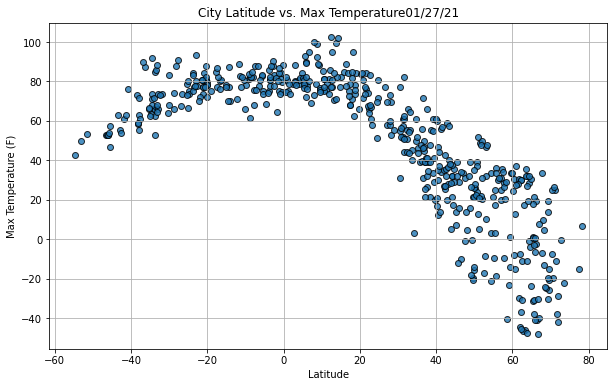

In [44]:
import time
import matplotlib.pyplot as plt
import numpy as np
# Build the scatter plot for latitude vs. max temperature.
plt.subplots(figsize=(10,6))
plt.scatter(lats,max_temps,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")
plt.title(f"City Latitude vs. Max Temperature"+time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
plt.show()



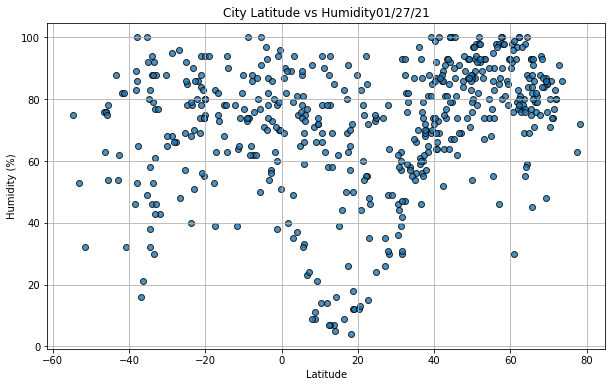

In [45]:
plt.subplots(figsize=(10,6))
#add scatter plot, change color, marker, linewidth
plt.scatter(lats,humidity,alpha=0.8,edgecolor="Black",marker="o",linewidths=1,label="Cities")
#add title and axis labels
plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
#save the scatter plot
plt.savefig("weather_data/Fig2.png")
#show the plot
#plt.show()

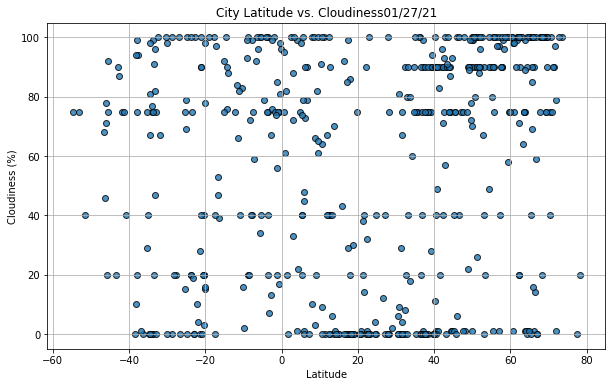

In [47]:
plt.subplots(figsize=(10,6))
#add scatter plot, change color, marker, linewidth
plt.scatter(lats,cloudiness,alpha=0.8,edgecolor="Black",marker="o",linewidths=1,label="Cities")
plt.title(f"City Latitude vs. Cloudiness"+time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
#Save the plot
plt.savefig("weather_data/Fig3.png")
#show the plot
plt.show()



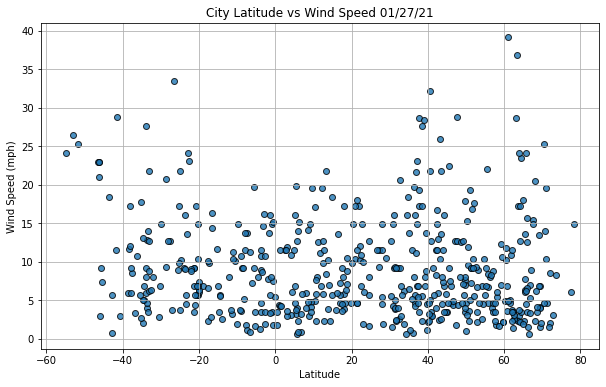

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.subplots(figsize=(10,6))
plt.scatter(lats,wind_speed,alpha=0.8,edgecolor="Black",marker="o",linewidths=1,label="Cities")
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#save the plot
plt.savefig("weather_data/Fig3.png")
#show the plot
plt.show()